**Load functions**

In [1]:
# Loads libraries and automatically installs them if needed.
# Source code: https://stackoverflow.com/questions/19596359/install-package-library-if-not-installed
usePackage <- function(p) {
    if (!is.element(p, installed.packages()[,1]))
        install.packages(p, dependencies = TRUE)
    require(p, character.only = TRUE)
}

In [2]:
usePackage('GGally')
usePackage('ggplot2')
usePackage('ppcor')
usePackage('openintro')
usePackage('stargazer')
usePackage('mctest')
usePackage('yhat')
# usePackage('lmtest') # This package is for the bp test further down. It did not work in Jupyter notebook for Mac but it does work in Windows.

Loading required package: GGally
Loading required package: ggplot2
Loading required package: ppcor
Loading required package: MASS
Loading required package: openintro
Please visit openintro.org for free statistics materials

Attaching package: 'openintro'

The following objects are masked from 'package:MASS':

    housing, mammals

The following object is masked from 'package:ggplot2':

    diamonds

The following objects are masked from 'package:datasets':

    cars, trees

Loading required package: stargazer

Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 

Loading required package: mctest
Loading required package: yhat


In [3]:
# Look at the data dictionary
help(ncbirths)

ncbirths {openintro},R Documentation


In [4]:
# From here onwards we will assign the data set to a new variable so the original dataframe remains untouched and in its originial condition.
df <- ncbirths

In [5]:
# Look at the structure of the data
# Notice how there are continous and categorical variables
# Categorical variables are known as factor type data in R. The sample below has factors with different levels.
# These factors can be given an order. This would make them ordinal variables.
str(df)

'data.frame':	1000 obs. of  13 variables:
 $ fage          : int  NA NA 19 21 NA NA 18 17 NA 20 ...
 $ mage          : int  13 14 15 15 15 15 15 15 16 16 ...
 $ mature        : Factor w/ 2 levels "mature mom","younger mom": 2 2 2 2 2 2 2 2 2 2 ...
 $ weeks         : int  39 42 37 41 39 38 37 35 38 37 ...
 $ premie        : Factor w/ 2 levels "full term","premie": 1 1 1 1 1 1 1 2 1 1 ...
 $ visits        : int  10 15 11 6 9 19 12 5 9 13 ...
 $ marital       : Factor w/ 2 levels "married","not married": 1 1 1 1 1 1 1 1 1 1 ...
 $ gained        : int  38 20 38 34 27 22 76 15 NA 52 ...
 $ weight        : num  7.63 7.88 6.63 8 6.38 5.38 8.44 4.69 8.81 6.94 ...
 $ lowbirthweight: Factor w/ 2 levels "low","not low": 2 2 2 2 2 1 2 1 2 2 ...
 $ gender        : Factor w/ 2 levels "female","male": 2 2 1 2 1 2 2 2 2 1 ...
 $ habit         : Factor w/ 2 levels "nonsmoker","smoker": 1 1 1 1 1 1 1 1 1 1 ...
 $ whitemom      : Factor w/ 2 levels "not white","white": 1 1 2 2 1 1 1 1 2 2 ...


In [6]:
# Look at a sample of the data
head(df)

fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
NA,13,younger mom,39,full term,10,married,38,7.63,not low,male,nonsmoker,not white
NA,14,younger mom,42,full term,15,married,20,7.88,not low,male,nonsmoker,not white
19,15,younger mom,37,full term,11,married,38,6.63,not low,female,nonsmoker,white
21,15,younger mom,41,full term,6,married,34,8.00,not low,male,nonsmoker,white
NA,15,younger mom,39,full term,9,married,27,6.38,not low,female,nonsmoker,not white
NA,15,younger mom,38,full term,19,married,22,5.38,low,male,nonsmoker,not white


In [7]:
# Summary statistics
summary(df)

      fage            mage            mature        weeks             premie   
 Min.   :14.00   Min.   :13   mature mom :133   Min.   :20.00   full term:846  
 1st Qu.:25.00   1st Qu.:22   younger mom:867   1st Qu.:37.00   premie   :152  
 Median :30.00   Median :27                     Median :39.00   NA's     :  2  
 Mean   :30.26   Mean   :27                     Mean   :38.33                  
 3rd Qu.:35.00   3rd Qu.:32                     3rd Qu.:40.00                  
 Max.   :55.00   Max.   :50                     Max.   :45.00                  
 NA's   :171                                    NA's   :2                      
     visits            marital        gained          weight      
 Min.   : 0.0   married    :386   Min.   : 0.00   Min.   : 1.000  
 1st Qu.:10.0   not married:613   1st Qu.:20.00   1st Qu.: 6.380  
 Median :12.0   NA's       :  1   Median :30.00   Median : 7.310  
 Mean   :12.1                     Mean   :30.33   Mean   : 7.101  
 3rd Qu.:15.0            

**Creating ordinal variables**

In [8]:
# Creating levels for factor type data

df$lowbirthweight <- factor(df$lowbirthweight,
                                                  levels = c('low', 'not low'),
                                                  labels = c('low', 'not low'),
                            ordered=TRUE) # If ordered is left as FALSE then there won't be any order beyong the alphabetic order.

df$habit <- factor(df$habit,
                                                  levels = c('nonsmoker', 'smoker'),
                                                  labels = c('nonsmoker', 'smoker'),
                            ordered=TRUE) # If ordered is left as FALSE then there won't be any order beyong the alphabetic order.

In [9]:
# Notice how the 'habit' column is has an order to the values of the data column.
# This is useful for understanding regression. We'll use the variable 'habit' later on.
str(df)

'data.frame':	1000 obs. of  13 variables:
 $ fage          : int  NA NA 19 21 NA NA 18 17 NA 20 ...
 $ mage          : int  13 14 15 15 15 15 15 15 16 16 ...
 $ mature        : Factor w/ 2 levels "mature mom","younger mom": 2 2 2 2 2 2 2 2 2 2 ...
 $ weeks         : int  39 42 37 41 39 38 37 35 38 37 ...
 $ premie        : Factor w/ 2 levels "full term","premie": 1 1 1 1 1 1 1 2 1 1 ...
 $ visits        : int  10 15 11 6 9 19 12 5 9 13 ...
 $ marital       : Factor w/ 2 levels "married","not married": 1 1 1 1 1 1 1 1 1 1 ...
 $ gained        : int  38 20 38 34 27 22 76 15 NA 52 ...
 $ weight        : num  7.63 7.88 6.63 8 6.38 5.38 8.44 4.69 8.81 6.94 ...
 $ lowbirthweight: Ord.factor w/ 2 levels "low"<"not low": 2 2 2 2 2 1 2 1 2 2 ...
 $ gender        : Factor w/ 2 levels "female","male": 2 2 1 2 1 2 2 2 2 1 ...
 $ habit         : Ord.factor w/ 2 levels "nonsmoker"<"smoker": 1 1 1 1 1 1 1 1 1 1 ...
 $ whitemom      : Factor w/ 2 levels "not white","white": 1 1 2 2 1 1 1 1 2 2 ...


In [10]:
# Finally, don't be afraid of looking at the data in Excel.
# Notice the ordinal nature of the variables are not apparent.
write.csv(df, "df.csv", row.names=FALSE)

**Cleaning up the dataset**

In [11]:
# Drop the missing data from the dataframe for the purpose of this exercise
# How to report and treat missing data is important in your analysis. We won't disucss this in detail this session.
# To keep things simple we will drop all rows with missing data.
# Source code: https://stackoverflow.com/questions/4862178/remove-rows-with-all-or-some-nas-missing-values-in-data-frame#4862502
df <- na.omit(df) # We are overwriting the df.

In [12]:
# Notice how we have 200 rows removed from the total of 1000.
str(df)

'data.frame':	800 obs. of  13 variables:
 $ fage          : int  19 21 18 17 20 30 21 14 16 20 ...
 $ mage          : int  15 15 15 15 16 16 16 16 16 17 ...
 $ mature        : Factor w/ 2 levels "mature mom","younger mom": 2 2 2 2 2 2 2 2 2 2 ...
 $ weeks         : int  37 41 37 35 37 45 38 40 24 40 ...
 $ premie        : Factor w/ 2 levels "full term","premie": 1 1 1 2 1 1 1 1 2 1 ...
 $ visits        : int  11 6 12 5 13 9 15 12 5 8 ...
 $ marital       : Factor w/ 2 levels "married","not married": 1 1 1 1 1 1 1 1 1 1 ...
 $ gained        : int  38 34 76 15 52 28 75 9 12 20 ...
 $ weight        : num  6.63 8 8.44 4.69 6.94 7.44 7.56 5.81 1.5 8.25 ...
 $ lowbirthweight: Ord.factor w/ 2 levels "low"<"not low": 2 2 2 1 2 2 2 2 1 2 ...
 $ gender        : Factor w/ 2 levels "female","male": 1 2 2 2 1 2 1 1 2 1 ...
 $ habit         : Ord.factor w/ 2 levels "nonsmoker"<"smoker": 1 1 1 1 1 1 2 2 1 1 ...
 $ whitemom      : Factor w/ 2 levels "not white","white": 2 2 1 1 2 2 2 2 1 2 ...
 - attr

**Plot your data**

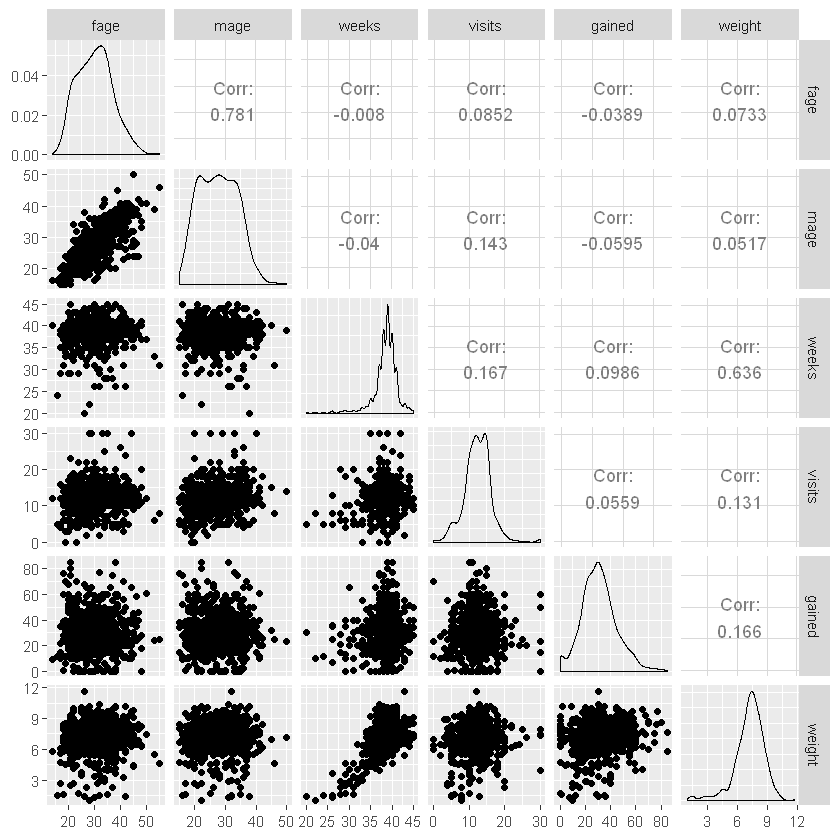

In [13]:
# The ggpairs package allows for seeing the relationship of all continous variables in two by two comparisons and the distribution of each variable.
# Drop column from data frame with a non-continous variable.
drops <- c('mature', 'premie', 'marital', 'lowbirthweight', 'gender', 'habit', 'whitemom')
df_cor <- df[ , !(names(df) %in% drops)]
# Print correlations
print(ggpairs(df_cor))

Saving 6.67 x 6.67 in image


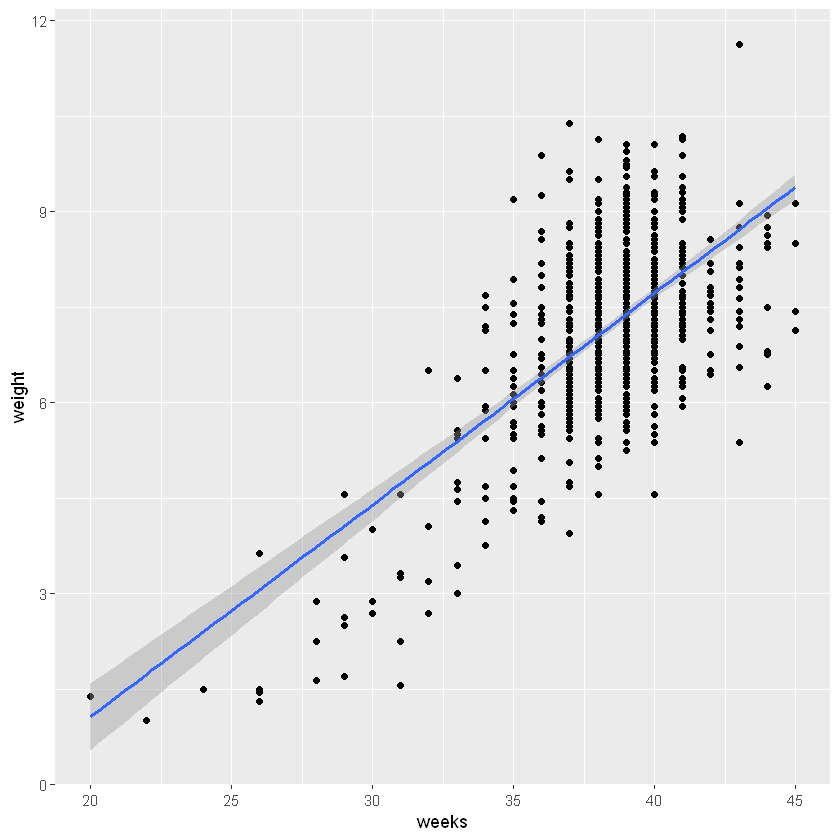

In [14]:
# First plot the relationship you want to use in your regression
p1 <- ggplot(df,aes(y = weight,x = weeks)) +
        geom_point() +
        geom_smooth(method="lm")

p1

ggsave('p1.pdf', plot = p1)

In [15]:
m1 <- lm(weight ~ weeks, data = df)

In [16]:
summary(m1)
# Adjusted R squared is the proportion of the variance in the data that's explained by the model. 
# From 0 to 100. Usually above 85 is good, this high number not achieved in a lot of clinicla work.


Call:
lm(formula = weight ~ weeks, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3371 -0.6961 -0.0534  0.7211  3.6594 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.5908     0.5513  -10.14   <2e-16 ***
weeks         0.3327     0.0143   23.27   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.113 on 798 degrees of freedom
Multiple R-squared:  0.4044,	Adjusted R-squared:  0.4036 
F-statistic: 541.7 on 1 and 798 DF,  p-value: < 2.2e-16


In [17]:
# Startgazer is a useful method to create regression tables for presentation.
# You can costumize it using this link: https://www.jakeruss.com/cheatsheets/stargazer/
# Simply copy/paste the output of the HTML file into Word. Or you can use R markdown.
invisible(capture.output(stargazer(m1, out = 'result1.html', model.names = FALSE))) # Change to 'TRUE' to display OLS

**Model quality**

Akaike Information Criterion

In [18]:
# A measure of model quality and simplicity. The lower the value the better.
# You want to select a model with the least complexity that explains the most variance.
AIC(m1)

[1] 2445.331

**Assumptions of the linear regression**

1. The relationship is linear (already checked in the first plotting)
2. The distrubtion of the residuals are normal (the plot below)
3. The variance (standard deviation) of the outcome y is constant over the predictor x (the test below).

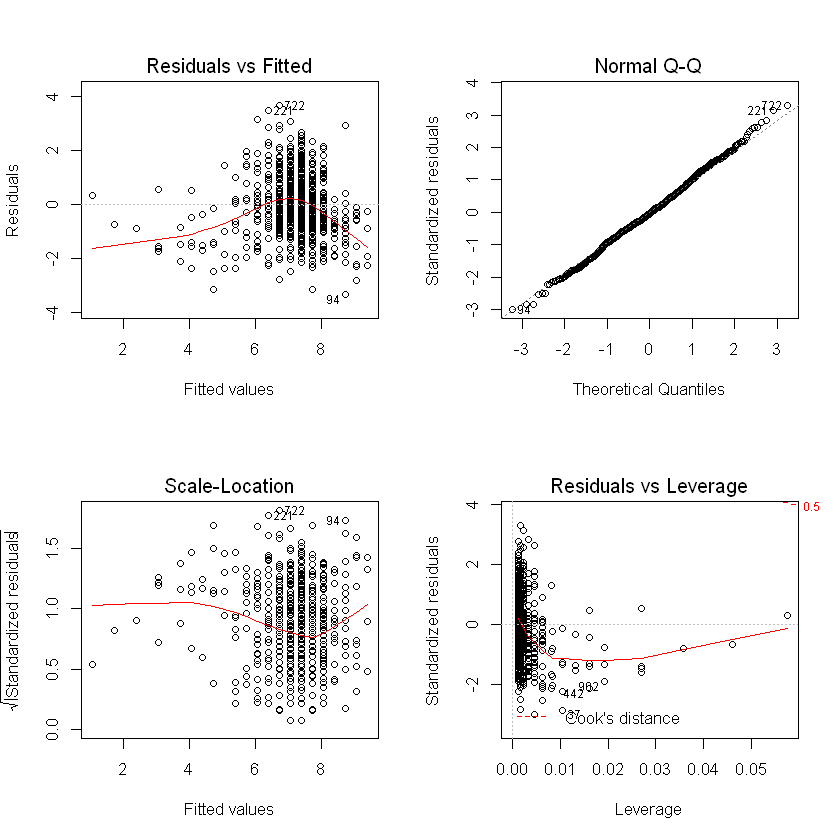

In [19]:
par(mfrow=c(2,2)) # to put the plots 2 by 2.

# The first plot is used to identify heteroscedasticity with residual plots. You want it to be random.
# The second plot shows the normal distribution of the residuals.
# You can plot these in ggplot for a better visualization as well.

plot(m1)

# Formal checking of Heteroscedasticity with the Breusch-Pagan test. The p value must be non-significant.
# bptest(m1) # Currently doesn't work in Jupyter on Mac, but worked in Windows version of Jupyter Lab's Anaconda

# Cook's distance measures the influence of a given data point. 
# These influential points can be omitted if beyond a certain threshold of influence.

In [20]:
# You can also include categorical variables such as smoking habit (yes/no).
# We made 'habit' an ordinal variable for this purpose. Non-smokers became the reference.
# If more than one category you'd need dummy variables.
m2 <- lm(weight ~ weeks + habit, data = df)
invisible(capture.output(stargazer(m2, out = 'result2.html')))

In [21]:
AIC(m2)

[1] 2441.609

**Tools to assess existence of multicollinearity**

In [22]:
# Notice how mother's age and father's age are highly correlated in the graph above. This is called collinearity, which can lead to distorted estimates.
# We will discuss this again further down.
m3 <- lm(weight ~ weeks + mage + fage, data = df)
invisible(capture.output(stargazer(m3, out = 'result3.html')))

In [23]:
# Drop column from data frame with a non-continous variable.
# We are about to assess all predictor variables that are continous so we will remove categorical ones and 
# 'weight' which is the outcome.
drops <- c('mature', 'premie', 'marital', 'lowbirthweight', 'gender', 'habit', 'whitemom', 'weight')
df_cor <- df[ , !(names(df) %in% drops)]

In [24]:
print(omcdiag(x = df_cor, y = df$weight))

# Error is most likely because the outcome variable is still in the dataframe.
# As such the outcome variable is also listed as a predictor.
# The error tells us one of the variables has exactly the same characteristic as the outcome variable.


Call:
omcdiag(x = df_cor, y = df$weight)


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.3633         0
Farrar Chi-Square:       805.9693         1
Red Indicator:             0.2616         0
Sum of Lambda Inverse:     8.3075         0
Theil's Method:           -0.3511         0
Condition Number:         48.5278         1

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test



In [25]:
# VIF and TOl are the same thing but inversed. You set the threshold or leave the default values.
print(imcdiag(x = df_cor, y = df$weight, vif = 2.5, tol = 0.40, all = TRUE))


Call:
imcdiag(x = df_cor, y = df$weight, vif = 2.5, tol = 0.4, all = TRUE)


All Individual Multicollinearity Diagnostics in 0 or 1 

       VIF TOL Wi Fi Leamer CVIF Klein
fage     1   1  1  1      0    0     1
mage     1   1  1  1      0    0     1
weeks    0   0  1  1      0    0     0
visits   0   0  1  1      0    0     0
gained   0   0  0  1      0    0     0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

fage , mage , visits , coefficient(s) are non-significant may be due to multicollinearity

R-square of y on all x: 0.4229 

* use method argument to check which regressors may be the reason of collinearity


NULL


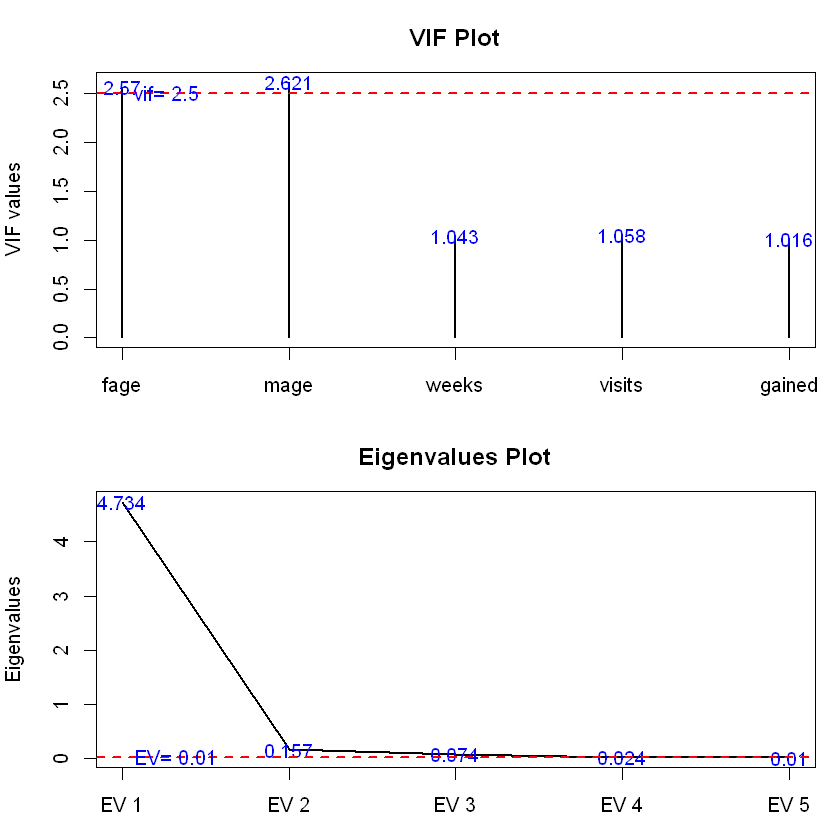

In [26]:
print(mc.plot(x = df_cor, y = df$weight, vif = 2.5))

**Tools to support interpreting multiple regression in the face of multicollinearity.**

Review: https://www.ncbi.nlm.nih.gov/pubmed/22457655

In [27]:
# Understand package
help('yhat')

yhat-package               package:yhat                R Documentation

_I_n_t_e_r_p_r_e_t_i_n_g _R_e_g_r_e_s_s_i_o_n _E_f_f_e_c_t_s

_D_e_s_c_r_i_p_t_i_o_n:

     The purpose of this package is to provide methods to interpret
     multiple linear regression and canonical correlation results
     including beta weights, structure coefficients, validity
     coefficients, product measures, relative weights,
     all-possible-subsets regression, dominance analysis, commonality
     analysis, and adjusted effect sizes.

_D_e_t_a_i_l_s:

       Package:   yhat       
       Type:      Package    
       Version:   2.0-0      
       Date:      2013-09-10 
       License:   GPL (>= 2) 
       LazyLoad:  yes        
      
_A_u_t_h_o_r(_s):

     Kim Nimon <kim.nimon@gmail.com>, Fred L. Oswald, J. Kyle Roberts

_R_e_f_e_r_e_n_c_e_s:

     Beaton, A. E. (1973) _Commonality_. (ERIC Document Reproduction
     Service No. ED111829)

     Butts, C. T. (2009). _yacca: Yet Another Canonical Correlation
     Analysis Package_. R package version 1.1.

     Mood, A. M. (1969) Macro-analysis of the American educational
     system. _Operations Research_, *17*, 770-784.

     Nimon, K., Lewis, M., Kane, R. & Haynes, R. M. (2008) An R package
     to compute commonality coefficients in the multiple regression
     case: An introduction to the package and a practical example.
     _Behavior Research Methods_, *40*(2), 457-466.

     Nimon, K., & Oswald, F. L. (2013). Understanding the results of
     multiple linear regression: Beyond standardized regression
     coefficients. _Organizational Research Methods_, _16_, 650-674.

_S_e_e _A_l_s_o:

     'regr' 'commonalityCoefficients' 'canonCommonality' 'calc.yhat'
     'boot.yhat' 'booteval.yhat' 'plotCI.yhat' 'aps' 'commonality'
     'dominance' 'dombin' 'rlw'

In [28]:
# Use sample code of the package in our data set
help('plotCI.yhat')

plotCI.yhat {yhat},R Documentation
sampStat,Set of sample statistics
upperCI,Set of upper CIs
lowerCI,Set of lower CIs
pid,Which set of Metrics to plot (default to all)
nr,Number of rows (default = 2)
nc,Number of columns(default = 2)


Loading required package: boot
Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"

NULL

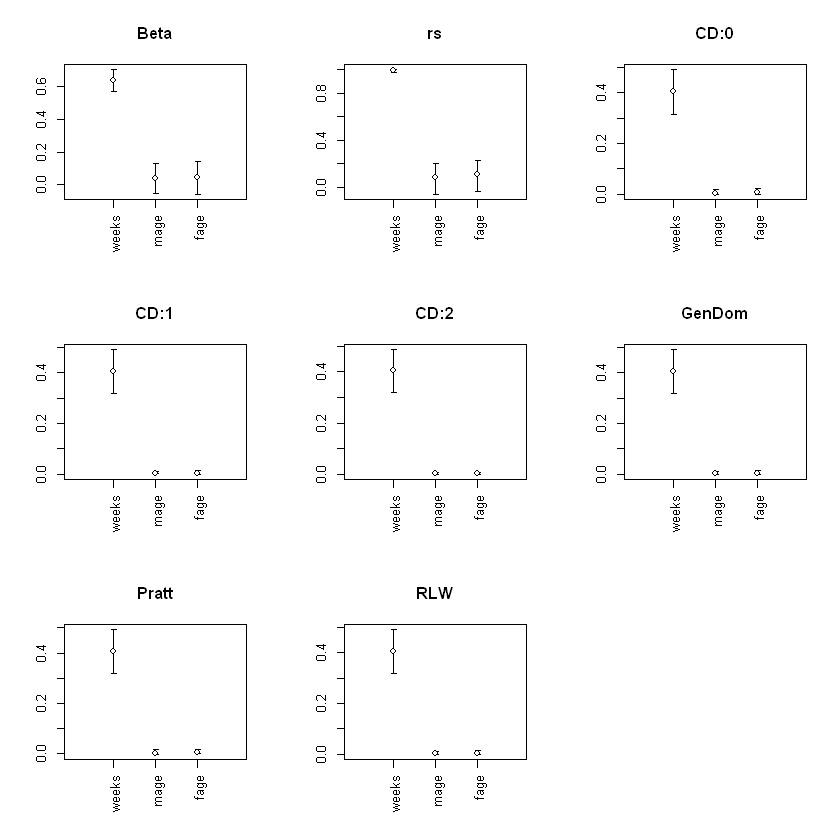

In [29]:
## Regression
lm.out <- m3 # you can also just type in the model.

## Calculate regression metrics
 regrOut<-calc.yhat(lm.out)

## Bootstrap results
 usePackage ("boot")
 boot.out<-boot(df,boot.yhat,100,lmOut=lm.out,regrout0=regrOut)

## Evaluate bootstrap results
 result<-booteval.yhat(regrOut,boot.out,bty="perc")

## Plot results
 plotCI.yhat(regrOut$PredictorMetrics[-nrow(regrOut$PredictorMetrics),],
 result$upperCIpm,result$lowerCIpm, pid=which(colnames(regrOut$PredictorMetrics) 
 %in% c("Beta","rs","CD:0","CD:1","CD:2","GenDom","Pratt","RLW") == TRUE),nr=3,nc=3)

In [30]:
regrOut

$PredictorMetrics
          b  Beta     r    rs   rs2 Unique Common  CD:0  CD:1  CD:2 GenDom
weeks 0.334 0.638 0.636 0.992 0.983  0.406 -0.001 0.404 0.406 0.406  0.405
mage  0.010 0.041 0.052 0.081 0.007  0.001  0.002 0.003 0.003 0.001  0.002
fage  0.010 0.046 0.073 0.114 0.013  0.001  0.005 0.005 0.004 0.001  0.004
Total    NA    NA    NA    NA 1.003  0.408  0.006 0.412 0.413 0.408  0.411
      Pratt   RLW
weeks 0.406 0.405
mage  0.002 0.002
fage  0.003 0.003
Total 0.411 0.410

$OrderedPredictorMetrics
      b Beta r rs rs2 Unique Common CD:0 CD:1 CD:2 GenDom Pratt RLW
weeks 1    1 1  1   1      1      3    1    1    1      1     1   1
mage  2    3 3  3   3      2      2    3    3    2      3     3   3
fage  3    2 2  2   2      3      1    2    2    3      2     2   2

$PairedDominanceMetrics
           Comp Cond Gen
weeks>mage    1    1   1
weeks>fage    1    1   1
mage>fage     0    0   0

$APSRelatedMetrics
                Commonality  % Total    R2 weeks.Inc mage.Inc fage.Inc
weeks                 0.406    0.987 0.404        NA    0.006    0.006
mage                  0.001    0.002 0.003     0.408       NA    0.003
fage                  0.001    0.002 0.005     0.405    0.000       NA
weeks,mage           -0.001   -0.001 0.410        NA       NA    0.001
weeks,fage            0.002    0.005 0.411        NA    0.001       NA
mage,fage             0.005    0.013 0.005     0.406       NA       NA
weeks,mage,fage      -0.003   -0.007 0.411        NA       NA       NA
Total                 0.411    1.000    NA        NA       NA       NA

**k-fold validation of models**

In [31]:
# Choosing the best model with the lowest AIC. This AIC is a measure of the simplicity of the model, the lower the better.
# Source code: http://www.sthda.com/english/articles/37-model-selection-essentials-in-r/154-stepwise-regression-essentials-in-r/

model_kfold <- function(df){
    
    usePackage("caret")

    
    # Set up repeated k-fold cross-validation
    train.control <- trainControl(method = "repeatedcv", number=10, repeats=3)
    # Train the model
    model <- train(weight ~ weeks, data = df, # instead of 'weight ~.', replace the '.' with specific predictors or interest.
                    method = "lm", # replace lm with lmStepAIC and see what happens
                    trControl = train.control)
    
    detach(package:caret)
    
    return(model)
    
}

# When you replace the 'lm' method with the 'lmStepAIC' in the above function the model will 

# We won't be discussing how to review the different models. Our focus is on the final chosen mdoel.

# Capture modeling
m4 <- model_kfold(df)
# Capture final model
fit4 <- m4$finalModel
# Capture RMSE
RMSE4 <- m4$results[, 2]
# Capture MAE
MAE4 <- m4$results[, 4]

# You can just click the blue bar on the left of the output to close the output of the modeling.

Loading required package: caret
Loading required package: lattice

Attaching package: 'lattice'

The following object is masked from 'package:boot':

    melanoma

The following object is masked from 'package:openintro':

    lsegments


Attaching package: 'caret'

The following object is masked from 'package:openintro':

    dotPlot



In [32]:
invisible(capture.output(stargazer(fit4, out = 'result4.html')))

In [33]:
# Model accuracy
m4$results
# Final model coefficients
m4$finalModel
# Summary of the model
summary(m4$finalModel)

intercept,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
TRUE,1.111576,0.3963065,0.8811238,0.08105668,0.1390833,0.07053324



Call:
lm(formula = .outcome ~ ., data = dat)

Coefficients:
(Intercept)        weeks  
    -5.5908       0.3327  



Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3371 -0.6961 -0.0534  0.7211  3.6594 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.5908     0.5513  -10.14   <2e-16 ***
weeks         0.3327     0.0143   23.27   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.113 on 798 degrees of freedom
Multiple R-squared:  0.4044,	Adjusted R-squared:  0.4036 
F-statistic: 541.7 on 1 and 798 DF,  p-value: < 2.2e-16
